# Transforming the input space

Linear predictors have many desirable properties. They:
  - can be trained by analytical methods
  - are easy to interpret for humans
  - theoretically well understood

However, their expressiveness is limited. For example, they cannot represent the XOR function. The first solution we presented to improve the expressiveness of linear predictors was to pass them through an activation function and build a network of them. The second is **kernel methods**. The core idea is to transform the input space to another space where the problem can be solved by linear methods. For instance, in classification, we expect from the transformed space that there exists a hyperplane that perfectly separates the classes. This way, nonlinearity is handled by the transformation and all the nice properties of linear predictors are preserved. 

Consider the case that 2D feature space $x = (x_1,x_2) \in \mathbb{R}^2$ contains data points from two classes, one is concentrated around the origin in the shape of a sphere and the other surrounds this sphere in the shape of a ring. The data is not linearly separable in the original space. However, if we transform the data to a new space $\phi(x) = (x_1^2, x_2^2, \sqrt{2} x_1 x_2) \in \mathbb{R}^3$, the classes become linearly separable as illustrated below.

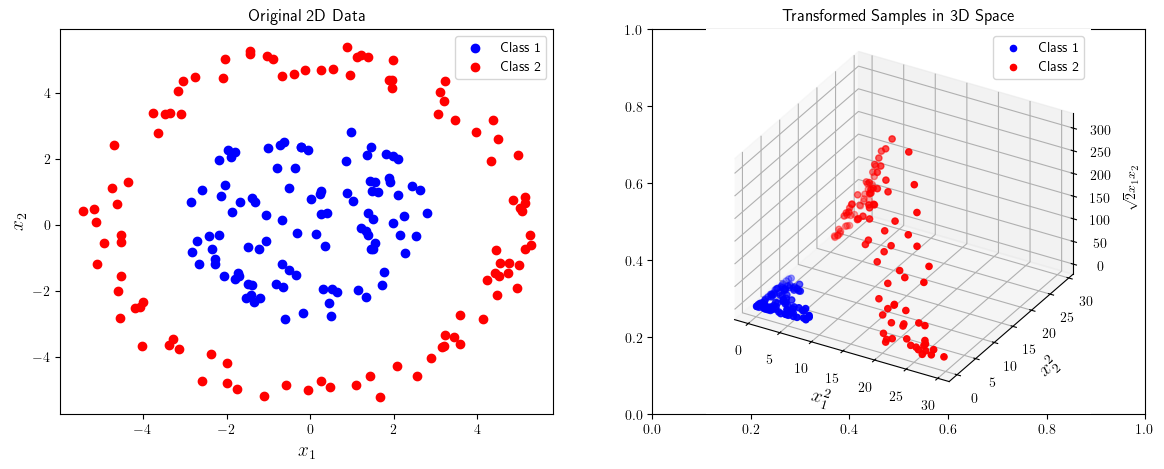

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['text.usetex'] = True # Enable Latex in plots

# Step 1: Generate random samples for two classes
np.random.seed(0)

# Number of samples for each class
num_samples = 100

# Class 1:
radius1 = 3
theta1 = 2 * np.pi * np.random.rand(num_samples)
r1 = np.sqrt(np.random.rand(num_samples)) * radius1
class1_x = r1 * np.cos(theta1)
class1_y = r1 * np.sin(theta1)

# Class 2
radius2 = 5
theta2 = 2 * np.pi * np.random.rand(num_samples)
r2 = (-0.5+np.random.rand(num_samples))  + radius2
class2_x = r2 * np.cos(theta2)
class2_y = r2 * np.sin(theta2)

# Step 2: Define the transformation function to 3D
def transform_to_3d(x, y):
    x_3d = x**2
    y_3d = y**2
    z_3d = np.sqrt(2)*x**2 *y**2 
    return x_3d, y_3d, z_3d

# Apply the transformation to both classes
class1_x_3d, class1_y_3d, class1_z_3d = transform_to_3d(class1_x, class1_y)
class2_x_3d, class2_y_3d, class2_z_3d = transform_to_3d(class2_x, class2_y)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# The classes are not linearly separable in 2D
axes[0].scatter(class1_x, class1_y, label='Class 1', c='b')
axes[0].scatter(class2_x, class2_y, label='Class 2', c='r')
axes[0].set_xlabel('$x_1$', fontsize=14)
axes[0].set_ylabel('$x_2$', fontsize=14)
axes[0].set_title('Original 2D Data')
axes[0].legend(loc='best')

# The classes are linearly separable in 3D after transformation
ax = fig.add_subplot(1, 2, 2, projection='3d', proj_type='ortho')

ax.scatter(class1_x_3d, class1_y_3d, class1_z_3d, label='Class 1', c='b')
ax.scatter(class2_x_3d, class2_y_3d, class2_z_3d, label='Class 2', c='r')
ax.set_xlabel('$x_1^2$', fontsize=14)
ax.set_ylabel('$x_2^2$', fontsize=14)
ax.set_zlabel('$\sqrt{2}  x_1  x_2$')

ax.legend(loc='best')
ax.set_title('Transformed Samples in 3D Space')

plt.show()


# Kernel Trick

In real-world applications, it is not as straightforward to find a suitable transformation space as in the example above that would make the problem linearly separable. The best one can often do is to transform the data to an as high dimensional space as possible. However, this is computationally expensive. There are attractive mathematical tools that allow us to model the **similarity** of a pair of data points in the transformation space without explicitly computing the representations of these data points in the transformation space. This can be achieved by a special family of functions, called **kernel functions** with certain characteristics. Given an input space $\mathcal{X}$, we would like to have a kernel function $k: \mathcal{X} \times \mathcal{X} \rightarrow \mathbb{R}^+$ with the following property:

   \begin{align*}
     k(x_i,x_j) =  \phi(x_i)^\top \phi(x_j).
   \end{align*}

In words, we would like to design directly the left hand side of the equation above without going through the computational steps of the right hand side. This is called the **kernel trick**. This is possible for only certain types of functions that have specific properties. Mercer's theorem gives us a sufficient condition for a function to be a valid kernel function.

**Mercer's theorem.** A function $k: \mathcal{X} \times \mathcal{X} \rightarrow \mathbb{R}^+$ is a **kernel function**, if the
Gram matrix it generates (i.e. the matrix generated by evaluating the function on all pairs of data points in an arbitrary data set with $m$ data points)

\begin{align*}
    K = \begin{bmatrix}
    k(x_1,x_1) & \cdots & k(x_1,x_m) \\
    \vdots & \ddots & \vdots \\
    k(x_m,x_1) & \cdots & k(x_n,x_m)
    \end{bmatrix}
\end{align*}

is positive semi-definite, i.e. $v^\top K v \geq 0$ for all $v \in \mathbb{R}^m$.

The most commonly used kernel functions are:

  - **Linear Kernel:** $k(x,y) =  x^\top y $ 
  - **Polynomial Kernel:** $k(x,y) = \left( x^\top y + c \right)^d$
  - **Radial Basis Function (RBF) Kernel:** $k(x,y) = \exp(-\frac{\| x-y \|^2}{2\sigma^2})$
  - **Sigmoid Kernel:** $k(x,y) = \tanh\left( \gamma  x^\top y  + c \right)$

There also exist kernels that compute the similarity of a pair of graphs, strings, or other complex objects. The nice property of the kernel functions is that one can compute these similarities directly, without needing to define suitable feature spaces for these object types.

One can imagine that it is not straightforward to devise a function that satisfies this condition. However, there are certain rules that allow us to construct new valid kernel functions from existing ones. These rules are called **kernel composition rules**. Given valid kernel functions $k_1$, $k_2$, a constant $a \in \mathbb{R}^+$, and a positive semi-definite matrix $B$, new valid kernel functions $k$ can be derived following the rules below
  - $k(x,y) = k_1(x,y) \cdot k_2(x,y)$
  - $k(x,y) = k_1(x,y) + k_2(x,y)$
  - $k(x,y) = a \cdot k_1(x,y)$
  - $k(x,y) = x^\top B  y$ 




# Kernel regression

Let us remember the linear methods we covered in this course: i) Linear regression, ii) Logistic Regression, iii) Principal Component Analysis. It is possible to apply the kernel trick to all of them, i.e. to **kernelize** them. Let us take **ridge regression** as an example. Consider the case where the raw inputs $x_i$ are passed through a feature extraction step $\phi(x_i)$. Call the matrix that contains $\phi(\cdot)^T$ in its rows as $\Phi$. The ridge regression loss function can then be expressed as Remember its loss function:

\begin{align*}
    L(w) &= \sum_{i=1}^m \frac{1}{2}(y_i - w^\top \phi(x_i))^2 + \lambda ||w||_2^2\\
      &= \frac{1}{2}y^\top y + \frac{1}{2}w^\top \Phi^\top \Phi w - y^\top X w + \lambda w^\top w.
\end{align*}

where $X \in \mathbb{R}^{m \times d}$ is the data matrix, $y \in \mathbb{R}^m$ is the target vector, and $w \in \mathbb{R}^d$ is the weight vector. We perform learning by minimizing this loss function with respect to the weights:

\begin{align*}
  \nabla_{w} L(w) &= w^\top \Phi^\top \Phi - y^\top \Phi + \lambda w^\top \triangleq 0 \\
    &\Rightarrow w^\top = -\frac{1}{\lambda} (w^\top \Phi^\top - y^T) \Phi.
\end{align*}

Denoting $a \triangleq -\frac{1}{\lambda} (\Phi w - y)$, we get

\begin{align*}
  w^\top &= a^\top \Phi.
\end{align*}

Placing this expression into the loss function gives its so-called **dual representation** that contains data only as inner products on the transformed space:

\begin{align*}
      L(w) &= \frac{1}{2}y^\top y + \frac{1}{2}w^\top \Phi^\top \Phi w - y^\top \Phi w + \lambda w^\top w\\
      &= \frac{1}{2}y^\top y + \frac{1}{2} a^\top \Phi \Phi^\top \Phi \Phi^\top a - y^\top \Phi \Phi^\top a + \lambda a^\top \Phi \Phi^\top a.
\end{align*}

Note that $K=\Phi \Phi^T$ is the $m \times m$ dimensional **Gram** matrix with $K_{ij} = \phi(x_i)^\top \phi(x_j)$. The inner product in this expression $\phi(x_i)^\top \phi(x_j)$ can be replaced by any kernel function, which would generate a Gram matrix with entries $K_{ij} = k(x_i,x_j)$. The kernelized version of the linear regression can then be expressed as

\begin{align*}
 L(a) = \frac{1}{2}y^\top y + \frac{1}{2} a^\top K K a - y^\top K a + \lambda a^\top K a.
\end{align*}

Setting the gradient of $L$ with respect to $a$, evaluating at zero and solving for $a$ gives

 \begin{align*}
 \nabla_{a} L(a) &\triangleq 0 = K K a - y^\top K + \lambda  K a \\
 \Rightarrow a &=(KK+\lambda K)^{-1} K y\\
 &=(K(K+\lambda I))^{-1} K y\\
  &=(K+\lambda I)^{-1} K^{-1} K y\\
  &=(K+\lambda I)^{-1} y.
\end{align*}

To reiterate, we first redefined the parameters $w$ by an expression that involves a newly introduced variable $a$ and then found the optimal value for this variable that minimizes the training loss. The resulting loss function does not have any trainable parameters left. Furthermore, the optimal value of $a$ requires generation of a Gram matrix using the whole training set and it appears as an intermediate result for calculation of the prediction function. We predict the label $y_*$ of a query input $x_*$ by

\begin{align*}
    f(x_*) &= \phi(x_*) \Phi^\top a \\
        &= k_*^\top (K+\lambda I)^{-1} y,
\end{align*}

where

\begin{align*}
    k_* = \begin{bmatrix}
             k(x_*, x_1)\\
             k(x_*, x_2)\\
             \vdots,\\
             k(x_*, x_m)
          \end{bmatrix}.   
\end{align*}

Because the prediction function requires computations on the whole training set, kernel regression is a lazy learner similar to the k-nearest neighbor approach. It is also a **non-parametric** method. As seen in the example implementation given below, its "predict" function takes the whole training set as an input to be able to calculate the $k_*$ vector.

A major weakness of the kernel methods is that many common kernel functions have tunable hyperparameters. For instance, the RBF kernel has a hyperparameter $\sigma$ that controls the length scale of the kernel. The performance of the model is sensitive to the choice of this hyperparameter. The example below performs kernel regression with three different choices of $\sigma^2$, each giving dramatically different outcomes. While $\sigma^2=0.1$ gives a reasonable fit, $\sigma^2=1$ overfits and  $\sigma^2=0.01$ underfits.

/var/folders/4w/g8b9hb551_n3042tz3nhkpj80000gn/T/ipykernel_28436/3807196410.py:36: RuntimeWarning: divide by zero encountered in matmul
  predictions = Kp.T @ self.a
/var/folders/4w/g8b9hb551_n3042tz3nhkpj80000gn/T/ipykernel_28436/3807196410.py:36: RuntimeWarning: overflow encountered in matmul
  predictions = Kp.T @ self.a
/var/folders/4w/g8b9hb551_n3042tz3nhkpj80000gn/T/ipykernel_28436/3807196410.py:36: RuntimeWarning: invalid value encountered in matmul
  predictions = Kp.T @ self.a


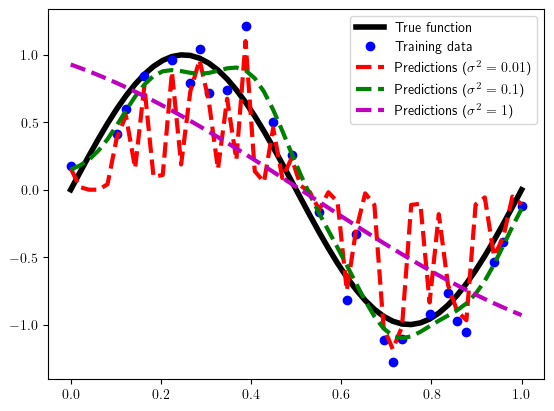

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import torch as th
import torch.nn as nn
from scipy.spatial.distance import cdist

# Generate the data
inputs = np.linspace(0, 1, 50)
outputs = np.sin(2*np.pi*inputs)                  
labels = outputs + np.random.randn(inputs.shape[0])*0.25

num_samples = inputs.shape[0]
num_train_samples = num_samples//2

inputs = np.expand_dims(inputs, axis=1)
idx = np.random.permutation(num_samples) 
inputs_train = inputs[idx[:num_train_samples]]
labels_train = labels[idx[:num_train_samples]]

class KernelLinearRegression:
    def __init__(self, lambda_reg=0, length_scale=0.1):
        self.lambda_reg = 0.1
        self.sigma = length_scale
      
    def compute_rbf_kernel(self, X, Xp):
        dist = cdist(X, Xp, 'euclidean') 
        return np.exp(-dist**2/(2*self.sigma**2))

    def precompute_a(self, inputs_train, labels_train):
        K = self.compute_rbf_kernel(inputs_train, inputs_train)
        self.a = np.linalg.inv(K + self.lambda_reg \
                    * np.eye(inputs_train.shape[0])) @ labels_train

    def predict(self, inputs_train, inputs):
        Kp = self.compute_rbf_kernel(inputs_train, inputs)
        predictions = Kp.T @ self.a
        return predictions

# Create three models with different kernel hyperparameters    
model1 = KernelLinearRegression(length_scale=0.01)
model1.precompute_a(inputs_train, labels_train)

model2 = KernelLinearRegression(length_scale=0.1)
model2.precompute_a(inputs_train, labels_train)

model3 = KernelLinearRegression(length_scale=1)
model3.precompute_a(inputs_train, labels_train)

# This is a "nonparametric model", so
#   i)  There is no "learn" function. ”precompute_a” only 
#       computes a value that is reused across different predictions
#   ii) Predict function takes the training data as input

predictions1 = model1.predict(inputs_train, inputs)
predictions2 = model2.predict(inputs_train, inputs)
predictions3 = model3.predict(inputs_train, inputs)

plt.plot(inputs,outputs,'k-', 
         label="True function", linewidth=4)
plt.plot(inputs_train,labels_train,'bo', 
         label="Training data")
plt.plot(inputs,predictions1,'r--', 
         label="Predictions ($\sigma^2=0.01$)", linewidth=3)
plt.plot(inputs,predictions2,'g--', 
         label="Predictions ($\sigma^2=0.1$)", linewidth=3)
plt.plot(inputs,predictions3,'m--', 
         label="Predictions ($\sigma^2=1$)", linewidth=3)
plt.legend(loc="upper right")
plt.show()

# Support Vector Machines

A prime application of kernel methods is the **Support Vector Machine (SVM)**. Among many possible hyperplanes that may separate the data points of two classes, SVM chooses the one that maximizes the smallest distance between a data point and the hyperplane. This distance is called the **margin**. Because of this property, SVM is also called a **maximum margin classifier**. The data points that are closest to the hyperplane are called **support vectors**. The margin-maximizing hyperplane is defined by only these support vectors. The other data points do not play any role in prediction. This is a desirable property especially when the SVM is kernelized, as the kernel function is evaluated only on the support vectors instead of the whole training set as was the case for kernel regression above.  The figure below illustrates the core idea behind the SVM. We leave the mathematical details out of our scope, since SVMs are greatly overshadowed by deep learning and Gaussian processes in the modern machine learning practice.

In [9]:
from IPython import display
display.Image("fig/svm.png")

FileNotFoundError: No such file or directory: 'fig/svm.png'

FileNotFoundError: No such file or directory: 'fig/svm.png'

<IPython.core.display.Image object>